In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *

In [2]:
T = 100
n_locations = 3  # number of locations
n_species = 3 # number of species
n_factors = 2  # number of latent factors

In [3]:
lmbda = npr.randn(n_species,n_factors)
alpha = 0
c = 0
phi = 0.1
logsigmasq = 0
x_0 = np.zeros((n_locations,n_factors))

theta = [alpha, lmbda, c, phi, logsigmasq]

In [4]:
Y, X = simulate_data(x_0, T, n_species, theta)

In [5]:
n_particles = 1_000
logNC = bootstrap_PF(npr.randn(n_locations,n_factors), n_particles, theta, Y)
print(logNC)

250.65512197844762


In [32]:
n_particles = T
n_mcmc = 50_000
eps = 2.5e-3
scale = [5*eps, eps*np.ones(np.shape(lmbda)), 2*eps, eps, eps]
theta_0 = theta

In [33]:
theta_chain, scale = pMCMC(x_0, Y, theta_0, n_particles, n_mcmc, scale, power=1, adapt=False)

/home/postdoc/dsen/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)
 19%|█▉        | 9396/50000 [02:21<10:43, 63.11it/s]/home/postdoc/dsen/Desktop/codes/DC-BATS/pseudo_marginal/ecology_functions.py:11: RuntimeWarning: overflow encountered in exp
  return np.sum(np.exp((y-1)*reg), (1,2))
/home/postdoc/dsen/Desktop/codes/DC-BATS/pseudo_marginal/ecology_functions.py:35: RuntimeWarning: invalid value encountered in true_divide
  weights /= np.sum(weights)
/home/postdoc/dsen/Desktop/codes/DC-BATS/pseudo_marginal/ecology_functions.py:52: RuntimeWarning: invalid value encountered in multiply
  weights = weights*incremental_weights
 19%|█▉        | 9528/50000 [0

4.71 % acceptance rate


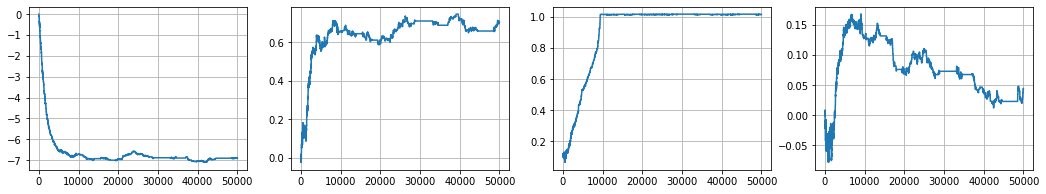

In [35]:
plt.rcParams['figure.figsize'] = (18, 3)
for (i,j) in enumerate([0,2,3,4]) :
    plt.subplot(1,4,i+1)
    plt.plot(theta_chain[j])
    plt.grid(True)

In [24]:
scale

[0.03518994422474691, array([[0.2091643 , 1.49297066],
        [1.51529553, 0.0821273 ],
        [0.70723767, 0.59256426]]), 25.550339114016605, 0.2570696988035494, 2.280171746163676]

In [25]:
theta

[0, array([[-0.87545877, -0.80766281],
        [-1.46257812, -0.03173571],
        [-1.82637941, -2.1117889 ]]), 0, 0.1, 0]